In [1]:
import xarray as xr
import dask
import matplotlib.pyplot as plt
import numpy as np
import os


import matplotlib as mpl
import scipy
import glob as glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import calendar
import xskillscore as xs
from scipy.stats import iqr

In [2]:
#loop to go through data folders. Do this in try except so that we know if/when somehting has failed, but the script will keep on running
datadir = '/home/z5113258/Documents/data/CMIP6_HB_new/'
#dict with file names
varis = {'dTdt':'_temp_tendency.nc', 't50':'_t50.nc', 'SST': '_tos.nc', 'z20': '_z20.nc'}
models={}
#get all data for temp tendency
var = 'thetao/*.nc'
for model in os.listdir(datadir):
    #go thorugh all varis
    if model == 'NESM3':
        pass
    else:
        mod={}
        for key in varis.keys():
            #input file
            inp_files = (os.path.join(datadir, model, str(model+varis[key])))
            try:
                #load in file
                var = xr.open_dataarray(inp_files)
                #put into dict
                mod[key]=var
            except Exception as e:
                print(e)
                pass
        #now append data to model dict
        models[model] = mod

[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_temp_tendency.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_t50.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_tos.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_z20.nc'


In [3]:
#load in REAn products with all HB terms
#loop to go through data folders. Do this in try except so that we know if/when somehting has failed, but the script will keep on running
datadir = '/home/z5113258/Documents/data/REAN_HB/'
varis = {'dTdt':'_temp_tendency.nc', 't50':'_t50.nc', 'SST': '_tos.nc', 'z20': '_z20.nc'}
OBS={}
#get all data for temp tendency
var = 'thetao/*.nc'
for model in os.listdir(datadir):
    #go thorugh all varis
    if model == 'NESM3':
        pass
    else:
        mod={}
        for key in varis.keys():
            #input file
            inp_files = (os.path.join(datadir, model, str(model+varis[key])))
            try:
                #load in file
                var = xr.open_dataarray(inp_files)
                #put into dict
                mod[key]=var
            except Exception as e:
                print(e)
                pass
        #now append data to model dict
        OBS[model] = mod

[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_temp_tendency.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_t50.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_tos.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_z20.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/GODAS/GODAS_t50.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/GODAS/GODAS_z20.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/SODA3.4.2/SODA3.4.2_t50.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/SODA3.4.2/SODA3.4.2_z20.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_temp_tendency.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ERA5/ERA

In [4]:
for i, model in enumerate(models.keys()):
    try:
        HB = models[model]
        t50=HB['t50']
        dTdt=HB['dTdt']
        sst=HB['SST']
        z20 = HB['z20']
        #now turn all these variables into an array
        if i == 0:
            dtm = dTdt
            z20m = z20
            t50m = t50
            sstm=sst
        else:
            dtm = xr.concat([dtm, dTdt], dim = 'model')
            t50m = xr.concat([t50m, t50], dim = 'model')
            sstm = xr.concat([sstm, sst], dim = 'model')
            z20m = xr.concat([z20m, z20], dim = 'model')
    except:
        print('error', model)

error not_full


In [5]:
def get_region(da, lat, lat_r, lon, lon_r):
    DA_ss = da.sel(lat=slice(lat, lat_r),lon=slice(lon, lon_r)).mean(['lat', 'lon'])
    return DA_ss

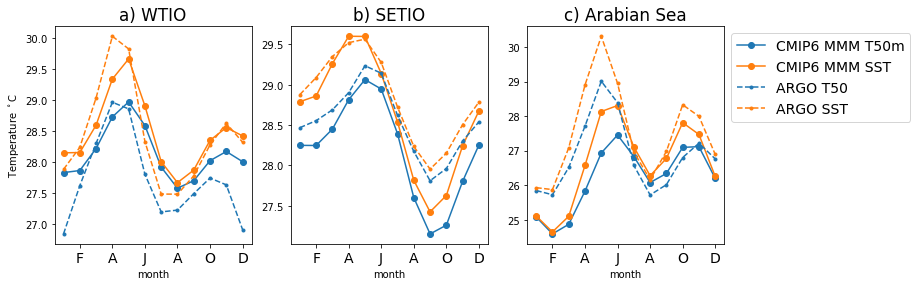

In [6]:
####SUPPFIGURE 1

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
plt.rcParams['font.size'] = 14
axs = axs.ravel()
#plot WTIO
axs[0].plot(range(1,13), get_region((t50m.median('model')), -10, 10, 50, 70), linestyle='-', marker='o',
            c = 'tab:blue', label = 'T50m')
#axs[0].fill_between(range(1,13), get_region(((t50m.quantile(0.25, 'model'))), -10, 10, 50, 70),
#                      get_region(((t50m.quantile(0.75, 'model'))), -10, 10, 50, 70), 
#                      alpha = 0.25, color='tab:blue', label = 'CMIP6 IQR')
axs[0].plot(range(1,13), get_region((sstm.median('model')), -10, 10, 50, 70), linestyle='-', marker='o',
            c = 'tab:orange', label = 'SST')
axs[0].plot(range(1,13), get_region((OBS['ARGO']['t50']), -10, 10, 50, 70), linestyle='--', marker='.',
            c = 'tab:blue', label = 'ARGO T50')
axs[0].plot(range(1,13), get_region((OBS['ARGO']['SST']), -10, 10, 50, 70), linestyle='--', marker='.',
            c = 'tab:orange', label = 'ARGO SST')

axs[1].plot(range(1,13), get_region((t50m.median('model')), -10, 0, 90, 110), linestyle='-', marker='o',
            c = 'tab:blue', label = 'T50m')
#axs[0].fill_between(range(1,13), get_region(((t50m.quantile(0.25, 'model'))), -10, 10, 50, 70),
#                      get_region(((t50m.quantile(0.75, 'model'))), -10, 10, 50, 70), 
#                      alpha = 0.25, color='tab:blue', label = 'CMIP6 IQR')
axs[1].plot(range(1,13), get_region((sstm.median('model')), -10, 0, 90, 110), linestyle='-', marker='o',
            c = 'tab:orange', label = 'SST')
axs[1].plot(range(1,13), get_region((OBS['ARGO']['t50']), -10, 0, 90, 110), linestyle='--', marker='.',
            c = 'tab:blue', label = 'ARGO T50')
axs[1].plot(range(1,13), get_region((OBS['ARGO']['SST']), -10, 0, 90,110), linestyle='--', marker='.',
            c = 'tab:orange', label = 'ARGO SST')


axs[2].plot(range(1,13), get_region((t50m.median('model')), 10, 20, 50, 70), linestyle='-', marker='o',
            c = 'tab:blue', label = 'CMIP6 MMM T50m')
#axs[0].fill_between(range(1,13), get_region(((t50m.quantile(0.25, 'model'))), -10, 10, 50, 70),
#                      get_region(((t50m.quantile(0.75, 'model'))), -10, 10, 50, 70), 
#                      alpha = 0.25, color='tab:blue', label = 'CMIP6 IQR')
axs[2].plot(range(1,13), get_region((sstm.median('model')), 10, 20, 50, 70), linestyle='-', marker='o',
            c = 'tab:orange', label = 'CMIP6 MMM SST')
axs[2].plot(range(1,13), get_region((OBS['ARGO']['t50']), 10, 20, 50, 70), linestyle='--', marker='.',
            c = 'tab:blue', label = 'ARGO T50')
axs[2].plot(range(1,13), get_region((OBS['ARGO']['SST']), 10, 20, 50, 70), linestyle='--', marker='.',
            c = 'tab:orange', label = 'ARGO SST')



axs[2].legend(bbox_to_anchor=(1, 1), loc='upper left')
axs[0].set_title('a) WTIO')
axs[1].set_title('b) SETIO')
axs[2].set_title('c) Arabian Sea')
axs[0].set_ylabel("Temperature $^\circ$C")

for i in range(0,3):
    axs[i].set_xlabel('month')
    axs[i].set_xticks([2,4,6,8,10,12]) 
    axs[i].set_xticklabels(['F', 'A', 'J','A','O','D'], fontsize=14)
#plt.savefig('/home/z5113258/Documents/figures/Paper_23-01-30/SF_1.svg', pad_inches = 1,  bbox_inches = 'tight')
plt.savefig('/home/z5113258/Documents/figures/Figures_high_res//SF_1.png',dpi = 600, pad_inches = 1,  bbox_inches = 'tight', facecolor = 'white')